In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
from sklearn.datasets import load_breast_cancer

In [8]:
bc_dataset = load_breast_cancer()
type(bc_dataset)

sklearn.utils.Bunch

# conveting dataset into a dataframe

In [6]:
bc_dataset_df = pd.DataFrame(np.c_[bc_dataset['data'],bc_dataset['target']],columns = np.append(bc_dataset['feature_names'], ['target']))

In [7]:
bc_dataset_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


# Data visualization

<AxesSubplot:xlabel='target', ylabel='count'>

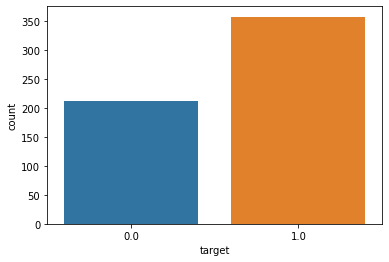

In [9]:
sns.countplot(bc_dataset_df['target'])

<AxesSubplot:>

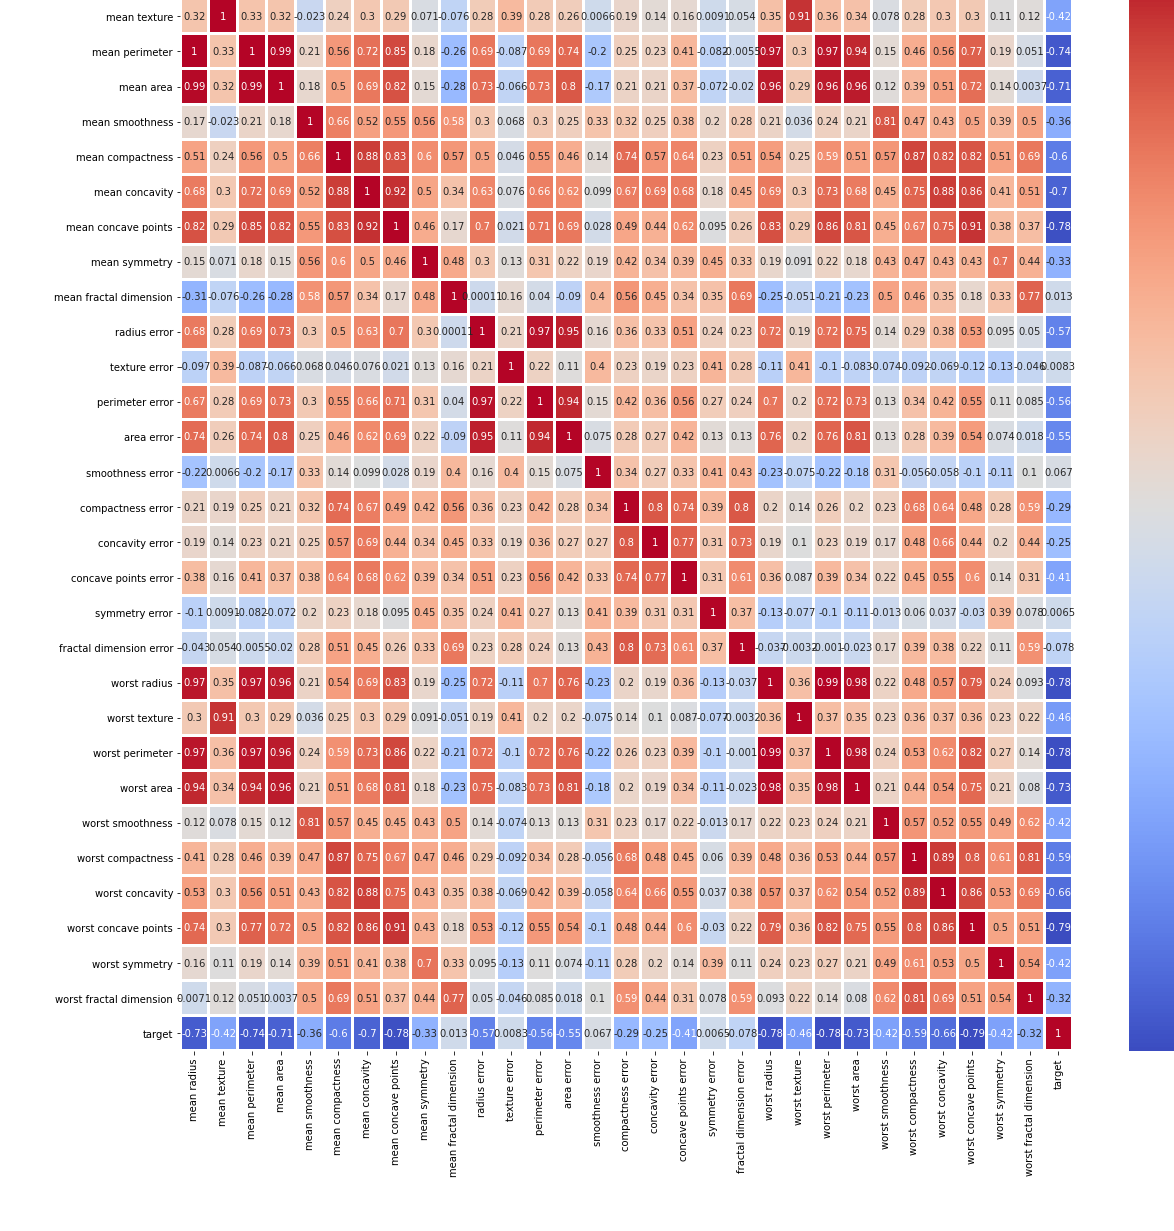

In [12]:
# heatmap with correlation matrix
plt.figure(figsize=(20,20))
sns.heatmap(bc_dataset_df.corr(), annot=True, cmap='coolwarm', linewidths=2)

# Data preprocessing

In [13]:
X = bc_dataset_df.drop(['target'],axis = 1)
print(X.shape)
y = bc_dataset_df['target']
print(y.shape)

(569, 30)
(569,)


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(455, 30)
(114, 30)
(455,)
(114,)


In [16]:
# feature scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [18]:
from xgboost import XGBClassifier

In [19]:
xgbc = XGBClassifier()
xgbc.fit(X_train_sc,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [20]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [21]:
y_pred_xgbc = xgbc.predict(X_test_sc)
y_pred_xgbc

array([0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
       1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1.,
       1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0.,
       1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0.])

In [22]:
print(accuracy_score(y_test,y_pred_xgbc))

0.9824561403508771


In [72]:
# parameter tuning
params = {
    "learning_rate"    : [0.01, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
    "max_depth"        : [ 3, 4, 5, 7, 8, 10, 12, 15, 18],
    "min_child_weight" : [ 1, 3, 5, 7 ],
    "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
    "n_estimators"     : [1000],
    "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
}

In [73]:
# Randomized Search
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(xgbc, param_distributions=params, scoring= 'roc_auc', n_jobs= -1, verbose= 3)
random_search.fit(X_train_sc, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    4.7s finished


RandomizedSearchCV(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           gpu_id=-1, importance_type='gain',
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=nan,
                                           monotone_constraints='()',
                                           n_estimators=100, n_jobs=0,
                                           num_paralle...
                                           scale_pos_weight=1, subsample=1,
                                           tree_method='exact',
                

In [74]:
print("Best params found in randomized search --> ",random_search.best_params_)
print("\nBest score found --> ",random_search.best_score_)
print("\nBest estimators found -->",random_search.best_estimator_)

Best params found in randomized search -->  {'n_estimators': 1000, 'min_child_weight': 1, 'max_depth': 4, 'learning_rate': 0.05, 'gamma': 0.0, 'colsample_bytree': 0.3}

Best score found -->  0.9942528735632183

Best estimators found --> XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [76]:
# training XgBoost Classifier with best params now 
xgbc_bparams = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, monotone_constraints='()',
              n_estimators=1000, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [77]:
xgbc_bparams.fit(X_train_sc,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, monotone_constraints='()',
              n_estimators=1000, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [78]:
y_pred_xgbc_bparams = xgbc_bparams.predict(X_test_sc)
y_pred_xgbc_bparams

array([0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
       1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1.,
       1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0.,
       1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0.])

In [79]:
print(accuracy_score(y_test,y_pred_xgbc_bparams))

0.9736842105263158


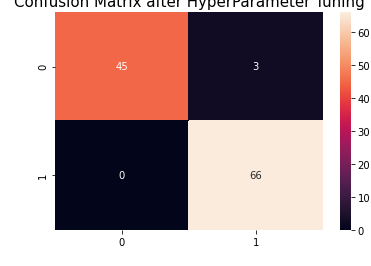

<Figure size 1440x1440 with 0 Axes>

In [83]:
cm = confusion_matrix(y_test, y_pred_xgbc_bparams)
plt.title('Confusion Matrix after HyperParameter Tuning', fontsize = 15,)
sns.heatmap(cm, annot = True)
plt.figure(figsize=(20,20))
plt.show()

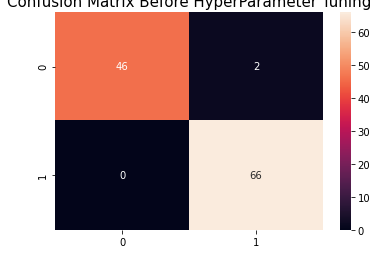

<Figure size 1440x1440 with 0 Axes>

In [84]:
cm = confusion_matrix(y_test, y_pred_xgbc)
plt.title('Confusion Matrix Before HyperParameter Tuning', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.figure(figsize=(20,20))
plt.show()

In [85]:
print(classification_report(y_test,y_pred_xgbc))

precision    recall  f1-score   support

         0.0       1.00      0.96      0.98        48
         1.0       0.97      1.00      0.99        66

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [88]:
# Cross validation
from sklearn.model_selection import cross_val_score
cross_validation = cross_val_score(estimator = xgbc, X = X_train_sc, y = y_train, cv = 10)
print("Cross validation of XGBoost model = ",cross_validation)
print("\nCross validation of XGBoost model (in mean) = ",cross_validation.mean())

from sklearn.model_selection import cross_val_score
cross_validation = cross_val_score(estimator = xgbc_bparams, X = X_train_sc,y = y_train, cv = 10)
print("\nCross validation accuracy of XGBoost model = ", cross_validation)
print("\nCross validation mean accuracy of XGBoost model = ", cross_validation.mean())

Cross validation of XGBoost model =  [1.         0.97826087 0.97826087 0.97826087 0.91304348 0.93333333
 1.         1.         0.95555556 0.88888889]

Cross validation of XGBoost model (in mean) =  0.96256038647343

Cross validation accuracy of XGBoost model =  [1.         0.97826087 0.97826087 1.         0.91304348 0.97777778
 1.         1.         0.97777778 0.91111111]

Cross validation mean accuracy of XGBoost model =  0.973623188405797


In [91]:
import pickle
# save model & load model
pickle.dump(xgbc, open('breast_cancer_detector.pickle', 'wb')) 
breast_cancer_detector_model = pickle.load(open('breast_cancer_detector.pickle', 'rb'))
 
# predict the output
y_pred = breast_cancer_detector_model.predict(X_test_sc)
print('Confusion matrix of XGBoost model: \n',confusion_matrix(y_test, y_pred))
print('\nAccuracy of XGBoost model = ',accuracy_score(y_test, y_pred))

Confusion matrix of XGBoost model: 
 [[46  2]
 [ 0 66]] 

Accuracy of XGBoost model =  0.9824561403508771


# we will now deploy the model